In [1]:
import numpy as np
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import tensorflow

## Giving path of the dataset

In [3]:
train_data_path="/Users/ayushmehta/Downloads/Projects My/Mask_or_not/drive-download-20210507T111403Z-001/self/dataset/train"
validation_data_path="/Users/ayushmehta/Downloads/Projects My/Mask_or_not/drive-download-20210507T111403Z-001/self/dataset/valid"

## Data augmentation

In [4]:
training_datagen=ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

In [5]:
training_data= training_datagen.flow_from_directory(train_data_path,
                                                   target_size=(200,200),
                                                   batch_size=128,
                                                   class_mode='binary')

Found 3649 images belonging to 2 classes.


In [6]:
 training_data.class_indices

{'with_mask': 0, 'without_mask': 1}

In [8]:
valid_datagen=ImageDataGenerator(rescale=1./255)

valid_data=valid_datagen.flow_from_directory(validation_data_path,
                                                   target_size=(200,200),
                                                   batch_size=128,
                                                   class_mode='binary')

Found 806 images belonging to 2 classes.


## Building a model

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten,Conv2D,MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from keras.optimizers import Adam

#Creating a neural network
model= Sequential()

#Pass1
model.add(Conv2D(32,(5,5),input_shape=[200,200,3]))
model.add(MaxPooling2D(pool_size=(4,4)))

#Pass2
model.add(Conv2D(64,(3,3)))
model.add(MaxPooling2D(pool_size=(3,3)))

#Pass3
model.add(Conv2D(128,(3,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

#Pass4
model.add(Conv2D(256,(2,2)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))
          
#Fully connected layer-1
model.add(Flatten())   
model.add(Dense(128))   #output layer # fully connect ANN Network
model.add(Activation('relu'))
model.add(Dropout(0.1))
          
model.add(Dense(256))  
model.add(Activation('relu'))
model.add(Dropout(0.25))
          
model.add(Dense(2))   #output layer
model.add(Activation('softmax'))  


## Compiling model

In [18]:
model.compile(loss="sparse_categorical_crossentropy", optimizer=Adam(lr=0.001),metrics=["accuracy"])

In [19]:
history= model.fit(training_data,epochs=50,verbose=1,validation_data=valid_data)

Epoch 1/50
 7/29 [======>.......................] - ETA: 48s - loss: 0.6882 - accuracy: 0.5391

/Users/ayushmehta/opt/anaconda3/lib/python3.8/site-packages/PIL/Image.py:951: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


29/29 [==============================] - 72s 2s/step - loss: 0.6119 - accuracy: 0.6348 - val_loss: 0.2550 - val_accuracy: 0.9032
Epoch 2/50
29/29 [==============================] - 69s 2s/step - loss: 0.3235 - accuracy: 0.8698 - val_loss: 0.2565 - val_accuracy: 0.9107
Epoch 3/50
29/29 [==============================] - 66s 2s/step - loss: 0.3088 - accuracy: 0.8854 - val_loss: 0.1637 - val_accuracy: 0.9417
Epoch 4/50
29/29 [==============================] - 137s 5s/step - loss: 0.2916 - accuracy: 0.8885 - val_loss: 0.1891 - val_accuracy: 0.9318
Epoch 5/50
29/29 [==============================] - 68s 2s/step - loss: 0.2828 - accuracy: 0.9028 - val_loss: 0.1539 - val_accuracy: 0.9504
Epoch 6/50
29/29 [==============================] - 66s 2s/step - loss: 0.2657 - accuracy: 0.9021 - val_loss: 0.1524 - val_accuracy: 0.9454
Epoch 7/50
29/29 [==============================] - 66s 2s/step - loss: 0.2421 - accuracy: 0.9153 - val_loss: 0.1666 - val_accuracy: 0.9392
Epoch 8/50
29/29 [============

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 196, 196, 32)      2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 128)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 5, 5, 256)         1

In [20]:
model.save("/Users/ayushmehta/Downloads/Projects My/Mask_or_not/drive-download-20210507T111403Z-001/self/final_model.h5")

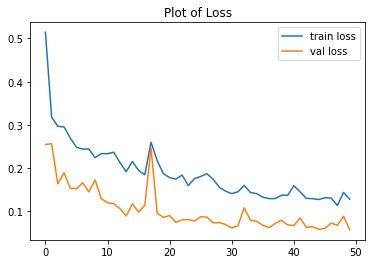

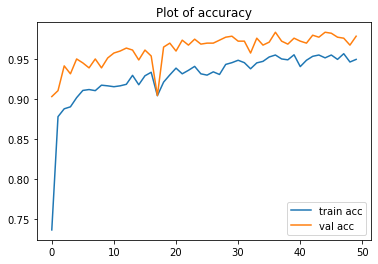

In [33]:
# plot the loss

plt.title('Plot of Loss')
plt.plot(model.history.history['loss'], label='train loss')
plt.plot(model.history.history['val_loss'], label='val loss')
plt.legend()
plt.show()

 
# plot the accuracy
plt.title('Plot of accuracy')
plt.plot(model.history.history['accuracy'], label='train acc')
plt.plot(model.history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
